# Proyecto de Aprendizaje Profundo: Clasificación de Fasion MNIST con Redes Convolucionales

**Alumno:** Kevin Martinez Trinidad.    **Matrícula:** A00834493  
**Alumno:** Miranda Isabel Rada Chau.   **Matrícula:** A01285243  
**Alumno:** Juan José H. Beltrán.       **Matrícula:** A00836747


## Preparación de datos

In [ ]:
# Librerias
import keras
from keras.utils import to_categorical
from keras import models, layers, optimizers
from keras import regularizers
import numpy as np
import pandas as pd
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = keras.datasets.fashion_mnist #Se manda a llamar la base de datos
(xTrain, yTrain), (xTest, yTest) = df.load_data()

Imágenes de muestra

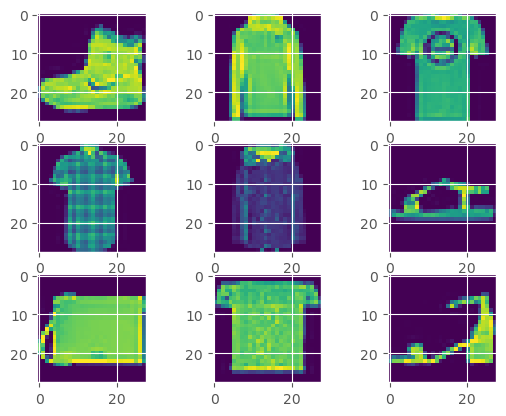

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(xTrain[i*24])
plt.show()

### Normalización de los datos
Como estos son imágenes RGB, solo es necesario dividirlos entre 255.

In [ ]:
Xtrain = xTrain/255
Xtest = xTest/255

### Convertir etiquetas a variables tipo One-Hot
En vez de un entero como 5, o 6, cada imagen incluirá un vector de puros 0 y un 1 que indica la clase a la que pertenece, esto con la finalidad de que cada neurona de la últipa capa represente la probabilidad de que la observación sea de cierta clase.

In [ ]:
Ytrain = to_categorical(yTrain)
Ytest = to_categorical(yTest)

# Diccionario de etiquetas
etiquetas = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Arquitectura del modelo

A continuación determinaré algunos hiperparámetros para poder ir probando más fácilmente.

In [ ]:
epocas = 12
tam_batch = 128
tasa_aprendizaje = 0.0005
optimizador = optimizers.Adam(learning_rate = tasa_aprendizaje)
costo = "categorical_crossentropy"

## Compilación del modelo

In [ ]:
mod = models.Sequential() #Se inicia modelo

mod.add(keras.Input(shape = (28,28,1)))

#Primera capa: Convolución 1
mod.add(layers.Conv2D(filters = 35, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu"))

#Segunda capa: Batch normalization
mod.add(layers.BatchNormalization())

#Tercera capa: Convolución 2
mod.add(layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu"))

#Cuarta capa: Batch normalization
mod.add(layers.BatchNormalization())

#Quinta capa: Pooling 1
mod.add(layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = "valid"))

#Sexta capa: Dropout
mod.add(layers.Dropout(0.7))

#Séptima capa: Flatten
mod.add(layers.Flatten())

#Octava capa: Densa 1
mod.add(layers.Dense(units = 256, activation = "relu"))

#Novena capa: Salida
mod.add(layers.Dense(units = 10, activation = "softmax"))

In [ ]:
mod.compile(optimizer = optimizador, loss = costo, metrics = ["accuracy"])

## Entrenamiento del modelo

In [ ]:
mod_entrenado = mod.fit(Xtrain,Ytrain, validation_data=(Xtest, Ytest), batch_size = tam_batch, epochs = epocas)

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 159ms/step - accuracy: 0.7644 - loss: 0.8021 - val_accuracy: 0.7888 - val_loss: 0.5767
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.8739 - loss: 0.3418 - val_accuracy: 0.8921 - val_loss: 0.2962
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.8922 - loss: 0.2859 - val_accuracy: 0.9021 - val_loss: 0.2635
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.9017 - loss: 0.2554 - val_accuracy: 0.9060 - val_loss: 0.2495
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 355s 758ms/step - accuracy: 0.9131 - loss: 0.2293 - val_accuracy: 0.9125 - val_loss: 0.2361
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 349s 746ms/step - accuracy: 0.9237 - loss: 0.2049 - val_accuracy: 0.9125 - val_loss: 0.2406
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 346s 739ms/step - accuracy: 0.9259 - loss: 0.1950 - val_accuracy: 0.9151 - val_loss: 0.2349
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 346s 740ms/step - accuracy: 0.9310 - los

In [ ]:
mod.summary()

Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_125 (Conv2D)             │ (None, 26, 26, 35)     │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 26, 26, 35)     │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_126 (Conv2D)             │ (None, 24, 24, 50)     │        15,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 24, 24, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 12, 12, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_59 (Flatten)            │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 256)            │     1,843,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,587,210 (21.31 MB)

 Trainable params: 1,862,346 (7.10 MB)

 Non-trainable params: 170 (680.00 B)

 Optimizer params: 3,724,694 (14.21 MB)

## Evaluación del modelo

Mostramos las gráficas comparando el accuracy y el costo a través de las épocas:

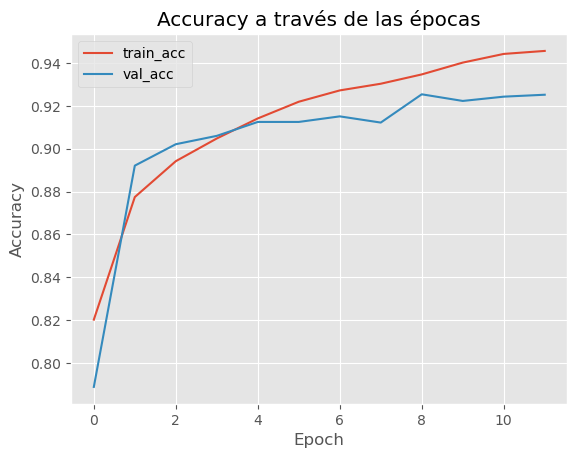

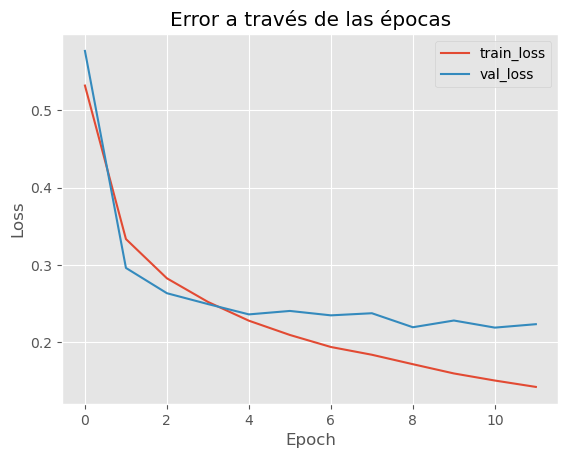

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,epocas),mod_entrenado.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,epocas),mod_entrenado.history["val_accuracy"],label="val_acc")
plt.title("Accuracy a través de las épocas")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(np.arange(0,epocas),mod_entrenado.history["loss"],label="train_loss")
plt.plot(np.arange(0,epocas),mod_entrenado.history["val_loss"],label="val_loss")
plt.title("Error a través de las épocas")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

**Utilizando la libreria sklearn, se despliega un reporte de clasificación y una matriz de confusión, que nos permiten tener una mejor idea del desempeño del modelo**

In [ ]:
predictions = mod.predict(Xtest, batch_size = 16)
print(classification_report(Ytest.argmax(axis=1), predictions.argmax(axis=1),target_names = etiquetas))

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.87      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.92      0.86      0.89      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.81      0.94      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.81      0.75      0.78      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.92     10000
weighted avg       0.93      0.93      0.92     10000



#### Matriz de confusión

In [ ]:
confusion_matrix(Ytest.argmax(axis=1), predictions.argmax(axis=1))

array([[870,   1,  18,  12,   4,   1,  91,   0,   3,   0],
       [  0, 979,   0,  12,   4,   0,   3,   0,   2,   0],
       [ 12,   0, 857,   9,  72,   0,  49,   0,   1,   0],
       [  7,   0,   8, 937,  33,   0,  13,   0,   2,   0],
       [  0,   0,  18,  14, 945,   0,  22,   0,   1,   0],
       [  0,   0,   0,   0,   0, 984,   0,   8,   0,   8],
       [ 83,   0,  32,  26, 108,   0, 747,   0,   4,   0],
       [  0,   0,   0,   0,   0,   5,   0, 978,   0,  17],
       [  1,   0,   1,   5,   4,   1,   0,   3, 985,   0],
       [  0,   0,   0,   0,   0,   3,   1,  26,   0, 970]])